In [1]:
import os
import glob
import sys
sys.path.append('..')
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from src import mod_plot
from src import mod_switchvar

In [2]:

# Region name
region = 'GS' # 'GS', 'Med' or 'Cir' 


# 21D orbit SWOT data

## Read from regional data file "../swot_data/swot_21j_share_'region'.nc"

In [3]:
path_data = '../swot_data/swot_21j_share_'+region+'.nc' 
 

In [4]:
ds_SWOT = xr.open_mfdataset(path_data)


In [5]:
ds_SWOT

<xarray.Dataset>
Dimensions:             (num_lines: 4277, num_pixels: 69)
Coordinates:
    latitude            (num_lines, num_pixels) float32 dask.array<chunksize=(4277, 69), meta=np.ndarray>
    longitude           (num_lines, num_pixels) float32 dask.array<chunksize=(4277, 69), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels
Data variables:
    time                (num_lines, num_pixels) datetime64[ns] dask.array<chunksize=(4277, 69), meta=np.ndarray>
    mss                 (num_lines, num_pixels) float32 dask.array<chunksize=(4277, 69), meta=np.ndarray>
    swh_model           (num_lines, num_pixels) float32 dask.array<chunksize=(4277, 69), meta=np.ndarray>
    ssha_new_editing    (num_lines, num_pixels) float32 dask.array<chunksize=(4277, 69), meta=np.ndarray>
    new_quality_flag    (num_lines, num_pixels) float64 dask.array<chunksize=(4277, 69), meta=np.ndarray>
    ssha_denoised_unet  (num_lines, num_pixels) float32 dask.array<chunksize=(4277, 69), meta=np.ndarray>
Attributes: (12/41)
    contact:                         aviso@altimetry.fr
    creator_email:                   aviso@altimetry.fr
    creator_name:                    DUACS - Data Unification and Altimeter C...
    creator_url:                     https://aviso.altimetry.fr
    institution:                     CNES
    license:                         https://www.aviso.altimetry.fr/fileadmin...
    ...                              ...
    time_coverage_begin:             2023-09-12T00:01:07Z
    time_coverage_end:               2023-09-12T00:52:34Z
    geospatial_lat_min:              -78.271903
    geospatial_lat_max:              78.272068
    geospatial_lon_min:              56.573842
    geospatial_lon_max:              223.503292

## Plot noisy and baseline denoised SSH

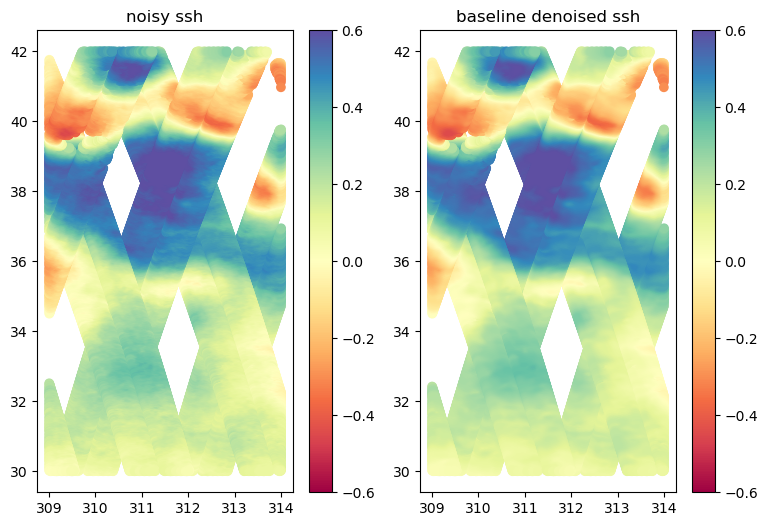

In [6]:
plt.figure(figsize=(14,6))

plt.subplot(131)
plt.title('noisy ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=ds_SWOT.ssha_new_editing,cmap='Spectral', vmin=-0.6, vmax =0.6) 
plt.colorbar()

plt.subplot(132)
plt.title('baseline denoised ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=ds_SWOT.ssha_denoised_unet,cmap='Spectral', vmin=-0.6, vmax =0.6) 
plt.colorbar()

## Compute and plot SSH gradients and Laplacian

In [7]:
grad_new_editing, lapl_new_editing = mod_switchvar.deriv1and2(ds_SWOT.ssha_new_editing)
grad_denoised_unet, lapl_denoised_unet = mod_switchvar.deriv1and2(ds_SWOT.ssha_denoised_unet)

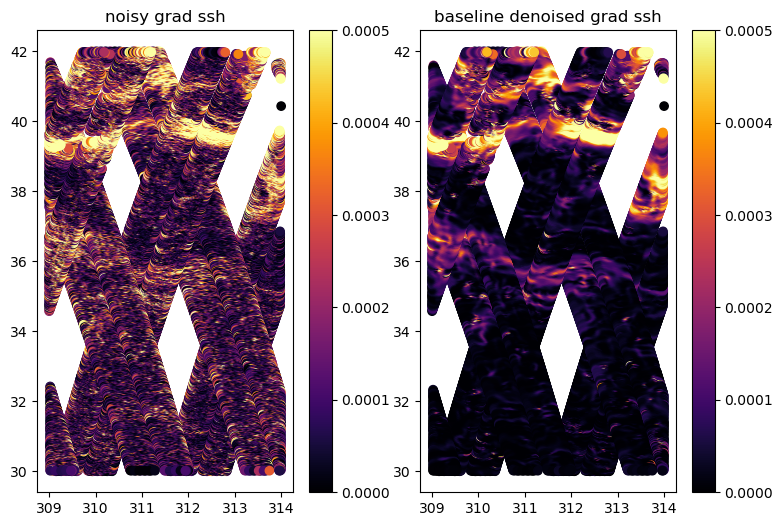

In [8]:
plt.figure(figsize=(14,6))

plt.subplot(131)
plt.title('noisy grad ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=grad_new_editing,cmap='inferno',vmin=0,vmax=0.0005) 
plt.colorbar()

plt.subplot(132)
plt.title('baseline denoised grad ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=grad_denoised_unet,cmap='inferno',vmin=0,vmax=0.0005) 
plt.colorbar()
plt.show()

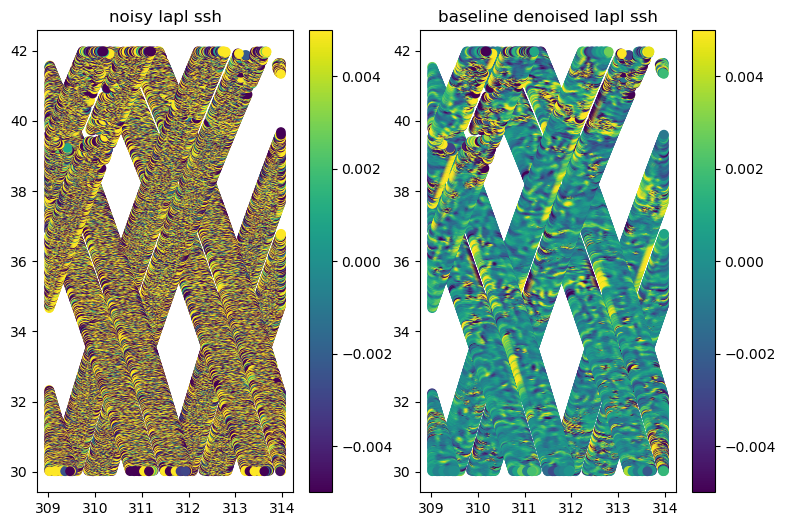

In [9]:
plt.figure(figsize=(14,6))

plt.subplot(131)
plt.title('noisy lapl ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=lapl_new_editing,cmap='viridis',vmin=-0.005,vmax=0.005) 
plt.colorbar()

plt.subplot(132)
plt.title('baseline denoised lapl ssh')
plt.scatter(ds_SWOT.longitude,ds_SWOT.latitude,c=lapl_denoised_unet,cmap='viridis',vmin=-0.005,vmax=0.005) 
plt.colorbar()
plt.show()